<h1 style="color: blue; text-align: center; font-size: 25px;"><b>MACHINE LEARNING ASSIGNMENT 4</b></h1>
<h2 style="color: blue; text-align: center; font-size: 25px;"><b>Classification: Breast Cancer Detection</b></h2>

### <font color=blue>Objective

The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

In this project, we aim to analyze the severity of breast cancer by building a classification model that can distinguish between benign and malignant tumors. Using the widely recognized Wisconsin Breast Cancer Dataset, we will explore the features of cell nuclei (such as radius, texture, and smoothness) to identify patterns that indicate tumor malignancy. Through careful preprocessing, feature scaling, and model evaluation, we will leverage machine learning techniques to develop a robust and accurate classification model. This approach not only enhances our understanding of predictive analytics but also demonstrates the potential of data science in addressing critical healthcare challenges.



### <font color=blue> Dataset:</font>
Use the breast cancer dataset available in the sklearn library.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### <font color=blue> 1. Loading and Preprocessing 

* Load the breast cancer dataset from sklearn.
* Preprocess the data to handle any missing values and perform necessary feature scaling.
* Explain the preprocessing steps you performed and justify why they are necessary for this dataset.


In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [26]:
# Display the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
df.shape

(569, 31)

In [44]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<font color=blue>No null values

In [51]:
df.duplicated().sum()

0

<font color=blue>No duplicates 

#### <font color=blue>Normalization/Scaling:

Standard Scaling is a preprocessing technique that transforms the features of a dataset such that they have a mean of 0 and a standard deviation of 1. It helps normalize the data and is particularly useful when the features have different scales, ensuring that no single feature dominates during modeling.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler=StandardScaler()

In [68]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### <font color=blue>2. Classification Algorithm Implementation

### Logistic Regression :
Logistic Regression is a statistical model used for binary classification tasks (e.g., yes/no, true/false, 0/1). It predicts the probability of an observation belonging to a particular class by modeling the relationship between independent variables (features) and the dependent variable (target).

Advantages of Logistic Regression:
* Simple and Interpretable: Coefficients show feature impact on the target.
* Efficient: Fast for small to medium datasets.
* Effective for Linearly Separable Data: Performs well when classes are separable.

Limitations of Logistic Regression:
* Assumes Linearity: Struggles with non-linear relationships.
* Outlier Sensitivity: Easily influenced by extreme values.
* Binary Classification Focus: Requires extensions for multi-class problems.


### Decision Tree Classifier :
A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It works by recursively splitting the dataset into subsets based on the value of features, forming a tree-like structure of decisions.

Key Concepts: 
* Root Node: The topmost node that represents the entire dataset.
* Internal Nodes: Points where the data is split based on a feature's value.
* Leaf Nodes: Terminal nodes that represent the final class label.

Advantages of Decision Tree Classifier:
* Interpretability: Easy to understand and visualize, even for non-technical stakeholders.
* No Data Preprocessing Required: Handles both numerical and categorical data without needing scaling or normalization.
* Feature Selection: Automatically identifies the most important features during the splitting process.

Limitations of Decision Tree Classifier:
* Overfitting: Prone to overfitting, especially with noisy data or when the tree is too deep.
* Instability: Small changes in data can lead to significantly different tree structures (high variance).
* Bias Towards Dominant Classes: Can be biased if one class dominates in the dataset without proper balancing techniques.

### Random Forest Classifier: 
A Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve the accuracy and stability of the model. It works by building a large number of decision trees and aggregating their predictions to make a final decision.

Advantages of RandomForestClassifier:
* High Accuracy: By combining multiple decision trees, it improves prediction accuracy and generalizes better than a single decision tree.
* Robust to Overfitting: Due to the ensemble nature and averaging of predictions, it is less likely to overfit, especially with large datasets.
* Handles Missing Data: It can handle missing values by using surrogate splits and can manage both categorical and numerical data.

Limitations of RandomForestClassifier:
* Complexity: Random forests are computationally expensive and can be slow to train, especially with large datasets.
* Model Interpretability: As an ensemble of trees, it is harder to interpret than a single decision tree.
* Memory Usage: It requires a large amount of memory due to the storage of multiple trees and their components.

### Support Vector Machine (SVM) :
Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification (and sometimes regression) tasks. It aims to find the optimal hyperplane that separates data points of different classes with the maximum margin.

Advantages of SVM:
* Effective in High Dimensional Spaces: SVM performs exceptionally well in high-dimensional feature spaces, making it ideal for complex data like text or image classification.
* Robust to Overfitting: By maximizing the margin between classes, SVM reduces the risk of overfitting, especially in high-dimensional data.
* Optimal Hyperplane: SVM guarantees finding the optimal decision boundary (hyperplane) that maximizes the margin, ensuring the best separation between classes.

Limitations of SVM:
* Memory Intensive: SVM can be computationally expensive, especially with large datasets, as it requires storing the entire dataset in memory.
* Sensitive to Noise: SVM is sensitive to noisy data and outliers, which can distort the optimal hyperplane and lead to poor performance.
* Not Suitable for Large Datasets: Training time grows significantly with larger datasets, making SVM inefficient for scaling to big data.

### The K-Nearest Neighbors (KNN): 
The K-Nearest Neighbors (KNN) classifier is a non-parametric and instance-based machine learning algorithm used for classification tasks. It predicts the class of a data point based on the majority class of its k nearest neighbors in the feature space.

Advantages :
* Simple to understand and implement.
* No training phase (instance-based learning).
* Works well with smaller datasets.

Limitations :
* Computationally expensive during inference (as all data points are used for prediction).
* Sensitive to irrelevant features and noisy data.
* Struggles with high-dimensional spaces (curse of dimensionality).

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [79]:
models={
   "Logistic_Regression":LogisticRegression(random_state=42,max_iter=1000),
   "Decision Tree Classifier":DecisionTreeClassifier(random_state=42),
   "Random Forest Classifier":RandomForestClassifier(random_state=42,n_estimators=100),
   "Support Vector Machine": SVC(probability=True, random_state=42),
   "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}
#iterate over madels
for name,model in models.items():
    print(f"Training and evaluating: {name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
 # Evaluate the model
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Training and evaluating: Logistic_Regression
Logistic_Regression Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------
Training and evaluating: Decision Tree Classifier
Decision Tree Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

------------------------------------------------------------
Training and evaluating: Random Fore

### <font color=blue>3. Model Comparison

* Compare the performance of the five classification algorithms.
* Which algorithm performed the best and which one performed the worst?


#### Identify the Best and Worst Performing Algorithms

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#Dictionary to store performance metrics:
performance = {}

# Iterate over models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Store metrics
    performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Convert the performance dictionary to a DataFrame for easy comparison
import pandas as pd
performance_df = pd.DataFrame(performance).T
print(performance_df)

                          Accuracy  Precision    Recall  F1-Score
Logistic_Regression       0.973684   0.972222  0.985915  0.979021
Decision Tree Classifier  0.947368   0.957746  0.957746  0.957746
Random Forest Classifier  0.964912   0.958904  0.985915  0.972222
Support Vector Machine    0.982456   0.972603  1.000000  0.986111
k-Nearest Neighbors       0.947368   0.957746  0.957746  0.957746


### Conclusion:
**Best Model:** Support Vector Machine (SVM)<br>

* It outperforms others across most metrics, including accuracy, recall, and F1-Score.
* Its perfect recall makes it especially suitable for scenarios where missing positive cases (false negatives) could be critical, like in breast cancer detection.<br>

**Worst Model:** Decision Tree and k-Nearest Neighbors<br>

Both have the lowest accuracy (0.947368) and F1-Score (0.957746), making them less suitable compared to other models.

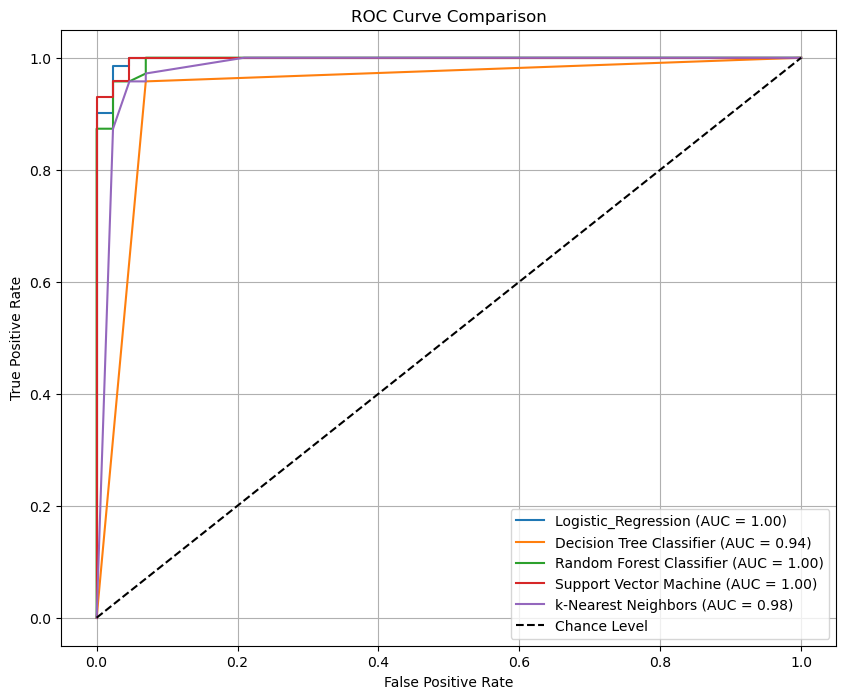

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a plot
plt.figure(figsize=(10, 8))

# Iterate over models
for name, model in models.items():
    # Predict probabilities for ROC
    if hasattr(model, "predict_proba"):  # Models like Logistic Regression, Random Forest
        y_probs = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM, use decision_function
        y_probs = model.decision_function(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], "k--", label="Chance Level")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [101]:
# Get predictions from the best model (e.g., from Grid Search or a chosen model)
model=SVC(probability=True, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Map 1 -> "Yes" and 0 -> "No"
mapping = {1: "Yes", 0: "No"}

# Apply the mapping to actual and predicted values
comparison = pd.DataFrame({
    'Actual': [mapping[val] for val in y_test[:5]],       # Convert y_test values
    'Predicted': [mapping[val] for val in y_pred[:5]]    # Convert y_pred values
})

# Display the comparison
print(comparison)

  Actual Predicted
0    Yes       Yes
1     No        No
2     No        No
3    Yes       Yes
4    Yes       Yes


### Predictions are done using the best model, that is SVM